#### Now let's assess the quality of data

In [4]:
import pandas as pd
from functools import reduce
import xlsxwriter
import pprint
import klib
from pandas_profiling import ProfileReport #cool package to describe a dataset

In [5]:
import os
os.getcwd()
folder = '/Users/anshulsaxena/MicroSave/cohort 3/contingency plan/Data Sources/wip'
os.chdir(folder)

In [ ]:

file_name = input("Please enter the file you wish to analyze") 
#file_name = 'World Bank data 7 July MSC R4 countries.xlsx' # This file has been taken from the World Bank site
read_sheet = input(f"Enter the sheet name to be read from the workbook {file_name}: ")

path = folder+'/'+file_name

df_for_analysis = pd.read_excel(path, sheet_name=read_sheet)
df_for_analysis = df_for_analysis[df_for_analysis.year>2014]
#df_for_analysis.head()


In [5]:
df_for_analysis.head()
#Let's try klib
klib.missingval_plot(df_for_analysis)
profile = ProfileReport(df_for_analysis)
profile.to_file(path+"1.html") #make this dynamic

No missing values found in the dataset.


In [6]:
df_for_analysis_cleaned = klib.data_cleaning(df_for_analysis)

- Long column names detected (>25 characters)! Consider renaming the following columns ['rank_enforcing_contracts_1=most_business_friendly_regulations', 'enforcing_contracts_time_days', 'global_ease_of_doing_business_score_db10_14_methodology', 'rank_ease_of_doing_business_index_1=most_business_friendly_regulations', 'rank_getting_credit_1=most_business_friendly_regulations', 'starting_a_business_cost__women_percent_of_income_per_capita', 'starting_a_business_cost__women_percent_of_income_per_capita__score', 'starting_a_business_cost__men_percent_of_income_per_capita', 'starting_a_business_cost__men_percent_of_income_per_capita__score', 'starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score', 'starting_a_business_time__women_days', 'starting_a_business_time__women_days__score', 'starting_a_business_time__men_days', 'starting_a_business_time__men_days__score', 'starting_a_business_minimum_capital_percent_of_income_per_capita', 'starting_a_business_procedures_re

In [7]:
df_for_analysis_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 52 to 129
Data columns (total 29 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   country                                                                          78 non-null     string 
 1   year                                                                             78 non-null     int16  
 2   rank_enforcing_contracts_1=most_business_friendly_regulations                    78 non-null     object 
 3   rank_ease_of_doing_business_index_1=most_business_friendly_regulations           78 non-null     object 
 4   rank_getting_credit_1=most_business_friendly_regulations                         78 non-null     object 
 5   starting_a_business_cost__women_percent_of_income_per_capita                     78 non-null     float32
 6   starting_a

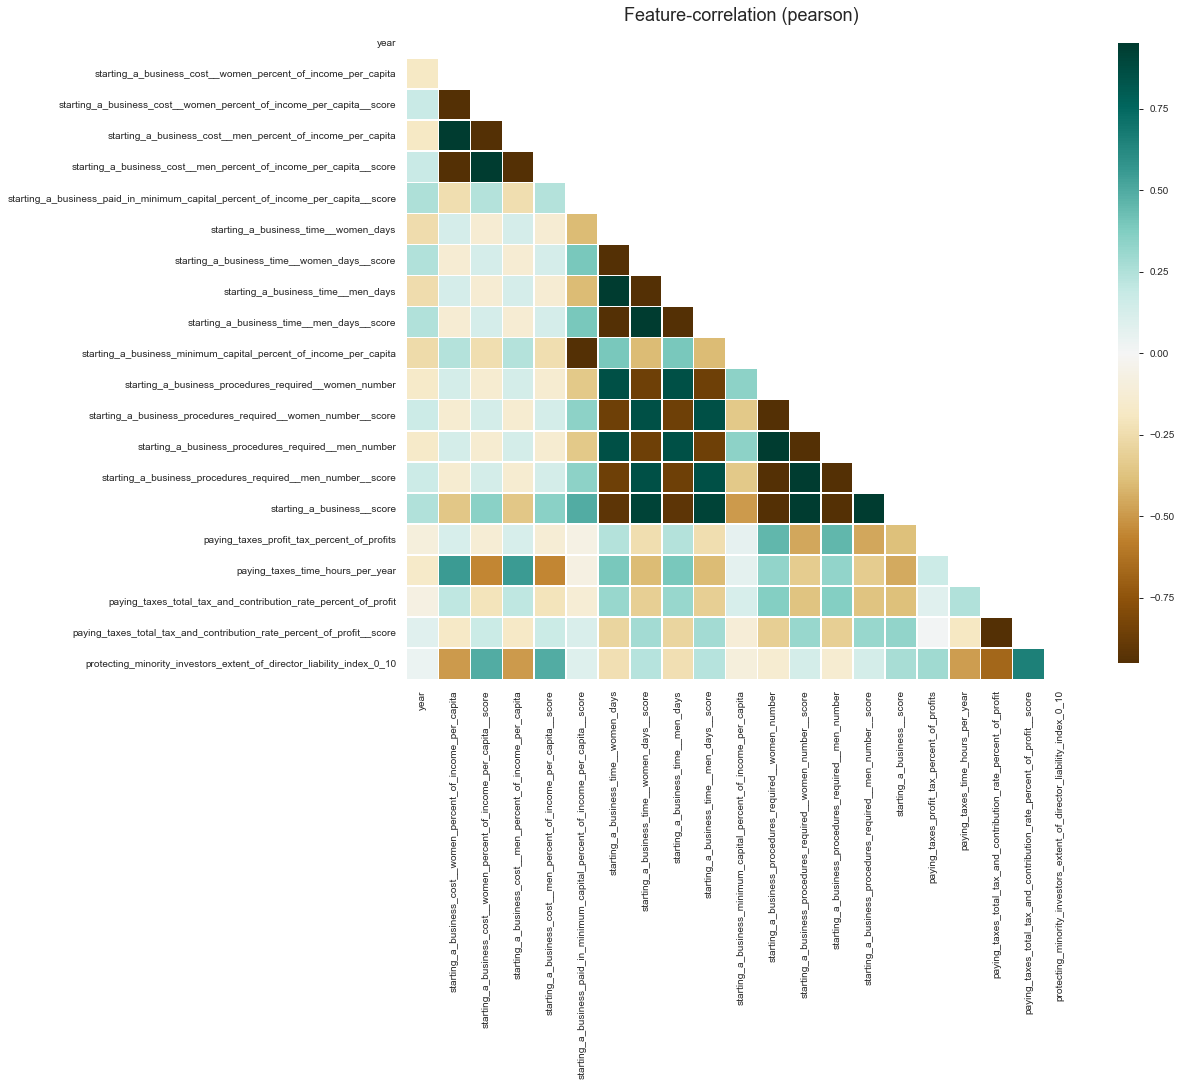

In [8]:
klib.corr_plot(df_for_analysis_cleaned, annot=False, figsize=(15,12))
#klib.corr_plot(df_for_profiling_cleaned, split='pos', annot=False, figsize=(15,12))
#klib.corr_plot(df_for_profiling_cleaned, split='neg', annot=False, figsize=(15,12))

In [9]:
df_for_analysis_cleaned.head()
#df_for_analysis_cleaned[df_for_analysis_cleaned.country=='India']


,country,year,rank_enforcing_contracts_1=most_business_friendly_regulations,rank_ease_of_doing_business_index_1=most_business_friendly_regulations,rank_getting_credit_1=most_business_friendly_regulations,starting_a_business_cost__women_percent_of_income_per_capita,starting_a_business_cost__women_percent_of_income_per_capita__score,starting_a_business_cost__men_percent_of_income_per_capita,starting_a_business_cost__men_percent_of_income_per_capita__score,starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score,...,starting_a_business__score,rank_starting_a_business_1=most_business_friendly_regulations,paying_taxes_profit_tax_percent_of_profits,rank_paying_taxes_1=most_business_friendly_regulations,paying_taxes_time_hours_per_year,paying_taxes_total_tax_and_contribution_rate_percent_of_profit,paying_taxes_total_tax_and_contribution_rate_percent_of_profit__score,protecting_minority_investors_extent_of_director_liability_index_0_10,rank_protecting_minority_investors_1=most_business_friendly_regulations,rank_resolving_insolvency_1=most_business_friendly_regulations
52,Bangladesh,2015,..,..,..,16.799999,91.576172,16.799999,91.576172,100.000000,...,81.355469,..,31.600000,..,422.000000,35.400002,86.879311,7.0,..,..
53,Côte d'Ivoire,2015,..,..,..,20.000000,90.018379,20.000000,90.018379,99.139519,...,89.773949,..,8.800000,..,272.000000,51.900002,62.357021,1.0,..,..
54,India,2015,..,..,..,16.400000,91.792213,16.400000,91.792213,72.199203,...,61.829510,..,23.400000,..,252.880005,55.500000,56.677410,6.0,..,..
55,Indonesia,2015,..,..,..,21.200001,89.393211,21.200001,89.393211,91.125381,...,64.055450,..,19.700001,..,253.000000,31.400000,92.567146,5.0,..,..
56,Senegal,2015,..,..,..,63.799999,68.107407,63.799999,68.107407,95.239197,...,85.042976,..,16.200001,..,620.000000,45.099998,72.749748,1.0,..,..


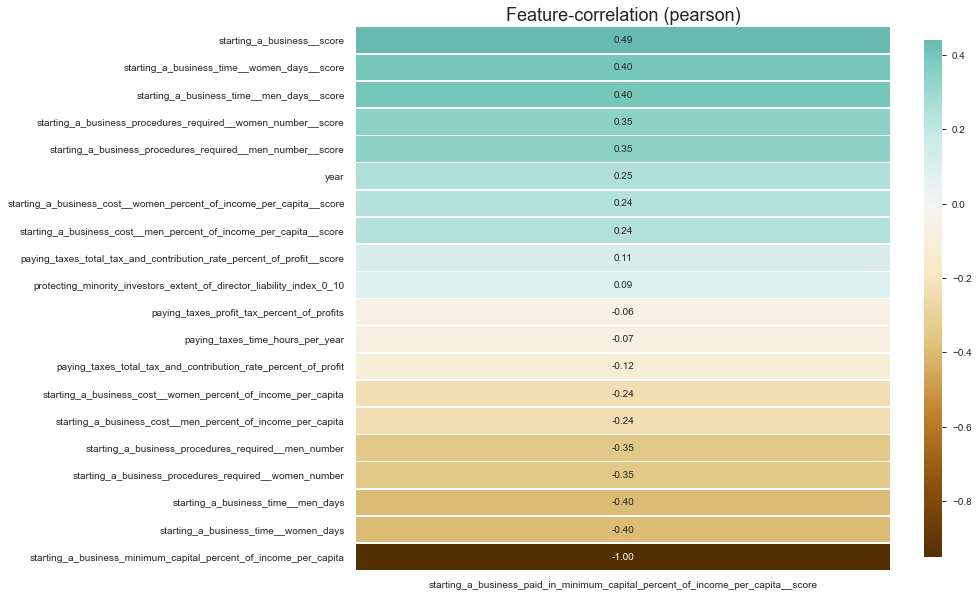

In [10]:
klib.corr_plot(data=df_for_analysis_cleaned, annot=True\
              , target='starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score')
#klib.corr_plot(data=df_for_analysis_cleaned[df_for_analysis_cleaned.country.isin(['India','United States'])], annot=True\
#              , target='starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score')

In [30]:
#df_for_analysis_cleaned.corr()

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

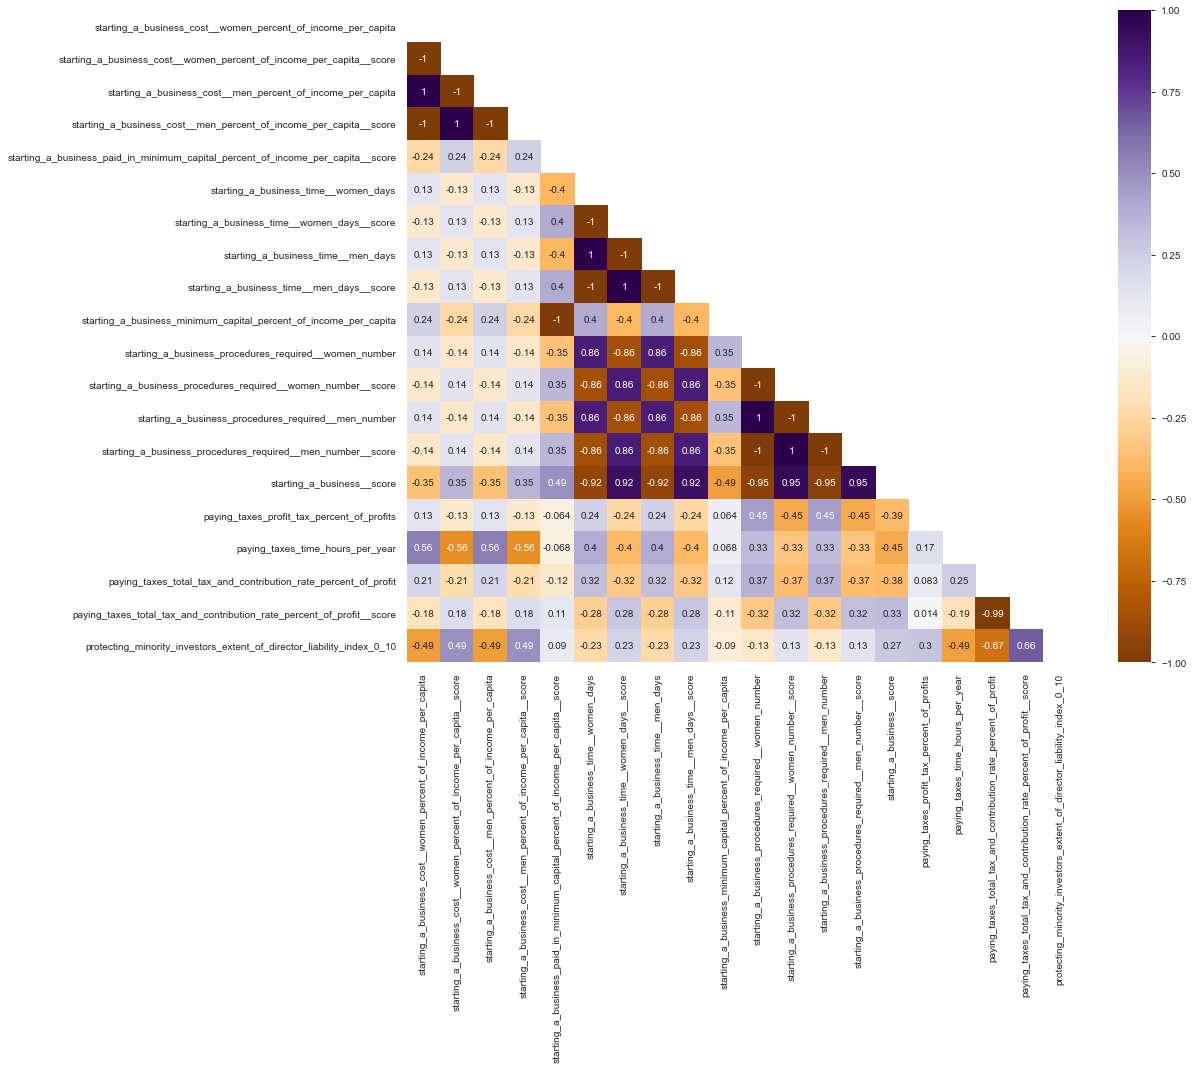

In [46]:
df_for_corr_matrix = df_for_analysis_cleaned.drop(columns='year') # year values could have distorted the corr matrix, so let's remove it
corr_matrix = df_for_corr_matrix.corr()
# NOTE: We don't need to normalize the values in this case as there is no particular outlier column wrt values

# we want to show only bottom half of correlation matrix as the upper half is redundant to it
mask = np.zeros(corr_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True 

fig, ax = plt.subplots(figsize=(15,12))         # Sample figsize in inches

sn.heatmap(data=corr_matrix, annot=True, cmap='PuOr',ax=ax, mask=mask)
plt.show()


In [6]:
file_name = input("Please enter the file you wish to analyze") 
#file_name = 'World Bank data 7 July MSC R4 countries.xlsx' # This file has been taken from the World Bank site
read_sheet = input(f"Enter the sheet name to be read from the workbook {file_name}: ")

path = folder+'/'+file_name

df_for_analysis = pd.read_excel(path)

Please enter the file you wish to analyze orange3_merged_data.xlsx
Enter the sheet name to be read from the workbook orange3_merged_data.xlsx:  Sheet1


In [9]:
df_for_analysis.head()

,country,year,Rank: Enforcing contracts (1=most business-friendly regulations),Enforcing contracts: Time (days),Rank: Ease of doing business index (1=most business-friendly regulations),Rank: Getting credit (1=most business-friendly regulations),Starting a business: Paid-in Minimum capital (% of income per capita) - Score,Starting a business: Minimum capital (% of income per capita),Starting a business: Procedures required - Women (number),Starting a business: Procedures required - Women (number) - Score,...,"Foreign direct investment, net inflows (BoP, current US$)",Market capitalization of listed domestic companies (% of GDP),"External debt stocks, total (DOD, current US$)",Net ODA received per capita (current US$),Total debt service (% of GNI),"Revenue, excluding grants (% of GDP)",Mobile cellular subscriptions (per 100 people),Gross savings (% of GDP),Net barter terms of trade index (2000 = 100),High-technology exports (% of manufactured exports)
0,Bangladesh,2015,..,..,..,..,100.00000,0.0,9.00,52.94118,...,2831152765.15515,..,36309037511.9,16.59395691798888,0.7995682151107506,9.844484138861645,84.0770862861214,36.73376985774979,67.89248122,0.3078877749186706
1,India,2015,..,..,..,..,72.19920,111.2,14.94,18.00000,...,44009492129.5319,72.07765217675643,478834120154.1,2.422886139343478,2.388572101912946,12.41520952352025,76.4075994294841,32.45392485327405,104.2283051,7.990802431975383
2,Indonesia,2015,..,..,..,..,91.12538,35.5,13.00,29.41176,...,19779127976.9576,41.03725643787922,307753587329.6,-0.110146452696117,7.24164791670302,12.96669933530489,131.180458535595,30.12335648797719,121.1597294,8.870209396998202
3,Senegal,2015,..,..,..,..,95.23920,19.0,4.00,82.35294,...,409166125.81491,..,5904876979.9,59.6359343888173,2.170723735776551,19.19785288812549,102.61356841625,20.54025020783933,108.8628824,3.751678243824622
4,Vietnam,2015,..,..,..,..,100.00000,0.0,9.00,52.94118,...,11800000000,30.39416942085452,77828621562.7,34.17662737415377,3.616790096609011,..,129.83151518505,24.45292627845848,131.0160287,..


In [13]:
df_for_analysis_cleaned = klib.data_cleaning(df_for_analysis)

In [165]:
#df_for_analysis_cleaned.info()

In [164]:
df_for_analysis_cleaned = df_for_analysis_cleaned.drop([x for x in df_for_analysis_cleaned if x.endswith('_score')], 1)
#df_for_analysis_cleaned.info()
#df_for_analysis_cleaned.describe()



In [157]:
df_for_corr_matrix.describe()

,starting_a_business_minimum_capital_percent_of_income_per_capita,starting_a_business_procedures_required__women_number,starting_a_business_procedures_required__men_number,protecting_minority_investors_extent_of_director_liability_index_0_10,"personal_remittances,_received_percent_of_gdp",monetary_sector_credit_to_private_sector_percent_gdp,domestic_credit_to_private_sector_percent_of_gdp,time_required_to_enforce_a_contract_days,start_up_procedures_to_register_a_business_number,exports_of_goods_and_services_percent_of_gdp,...,"foreign_direct_investment,_net_inflows_bo_p,_current_us_dollar",market_capitalization_of_listed_domestic_companies_percent_of_gdp,"external_debt_stocks,_total_dod,_current_us_dollar",net_oda_received_per_capita_current_us_dollar,total_debt_service_percent_of_gni,"revenue,_excluding_grants_percent_of_gdp",mobile_cellular_subscriptions_per_100_people,gross_savings_percent_of_gdp,net_barter_terms_of_trade_index_2000_=_100,high_technology_exports_percent_of_manufactured_exports
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,2.300000e+01,18.000000,2.000000e+01,20.000000,20.000000,13.000000,20.000000,23.000000,20.000000,17.000000
mean,8.604000,9.429200,9.429200,4.600000,5.421941,56.984020,58.169693,902.663879,9.080000,35.392845,...,1.640471e+10,52.234335,1.955582e+11,21.269035,3.609528,14.628683,110.317504,29.046914,107.016166,11.593402
std,23.435867,3.386635,3.386635,2.217356,3.323649,37.117489,36.386230,475.536102,3.094619,32.949451,...,1.680993e+10,17.842542,1.939976e+11,21.534402,2.349723,4.064445,25.031574,5.266918,23.319596,13.772721
min,0.000000,4.000000,4.000000,1.000000,0.885128,27.304686,27.304686,400.000000,4.000000,14.800959,...,4.091661e+08,28.240679,5.904877e+09,-0.413987,0.758529,9.844484,76.407599,20.540250,62.195213,0.307888
25%,0.000000,9.000000,9.000000,3.000000,2.734200,32.541027,38.732349,403.200012,8.000000,18.661968,...,2.071560e+09,37.011882,3.819476e+10,2.297575,2.097850,12.415210,87.223944,23.930945,102.286669,2.809320
50%,0.000000,9.000000,9.000000,5.000000,6.068489,45.312973,45.312973,740.000000,9.000000,20.177305,...,1.260000e+10,49.013439,9.487655e+10,16.844933,3.212773,12.966699,102.406088,30.830576,111.320532,7.943640
75%,4.600000,12.220000,12.220000,7.000000,6.820080,50.148262,50.148262,1442.000000,11.000000,22.792625,...,2.254594e+10,65.503056,3.601631e+11,31.820345,5.695237,19.197853,129.050968,32.126208,124.893811,8.870209
max,111.199997,14.940000,14.940000,7.000000,10.697246,137.912125,137.912125,1445.000000,14.000000,106.795547,...,5.060533e+10,87.892285,5.213906e+11,62.543681,8.082337,21.341300,164.440590,37.116193,132.974032,41.412450


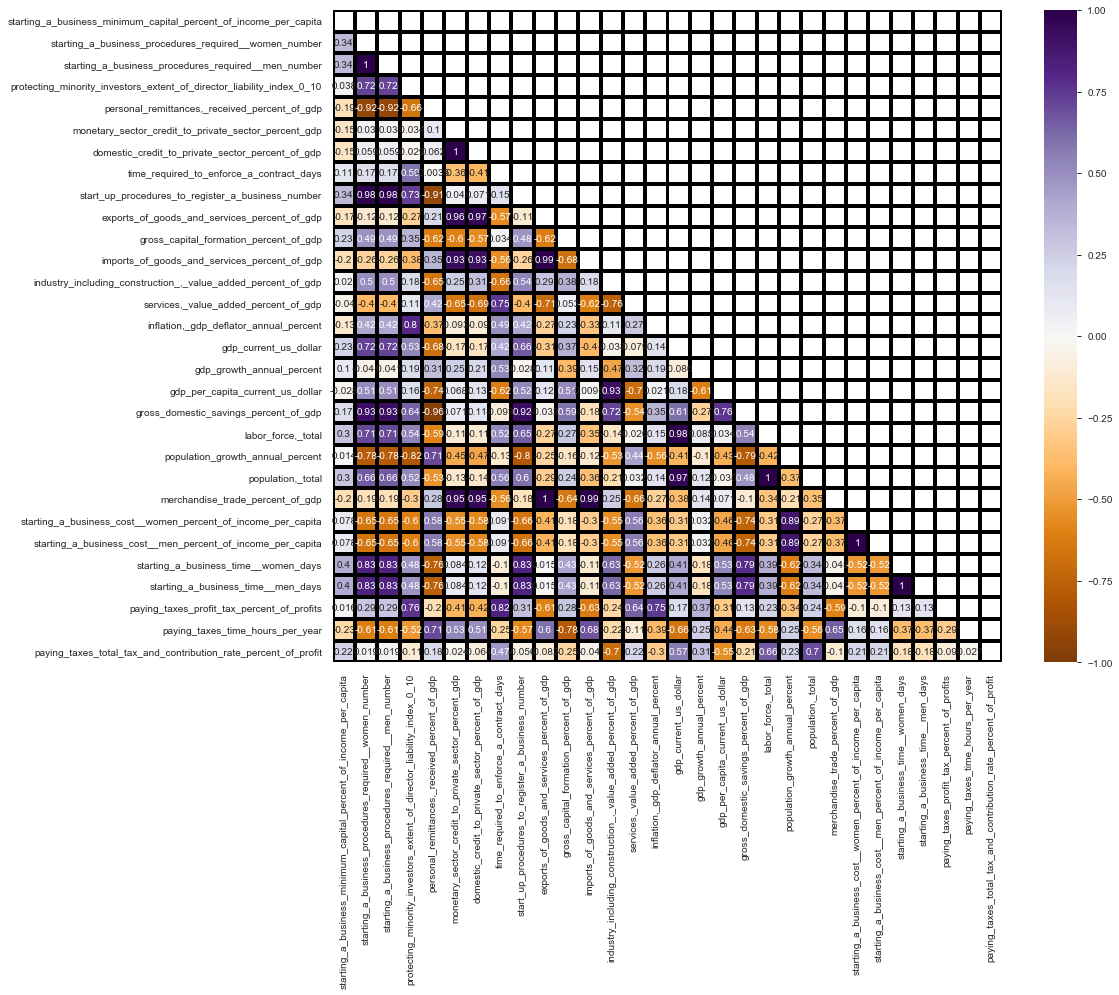

In [143]:
df_for_corr_matrix = df_for_analysis_cleaned.drop(columns='year') # year values could have distorted the corr matrix, so let's remove it
corr_matrix = df_for_corr_matrix.corr()
# NOTE: We don't need to normalize the values in this case as there is no particular outlier column wrt values
# However, we need to convert the many string column types of the dataframe to strengthen our correlation matrix.
# We'll do the above conversion later and also normalize the data to be sure that the resulting data is fine for correlation

# we want to show only bottom half of correlation matrix as the upper half is redundant to it
mask = np.zeros(corr_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True 

fig, ax = plt.subplots(figsize=(15,12))         # Sample figsize in inches

svm = sn.heatmap(data=corr_matrix, annot=True, cmap='PuOr',ax=ax, mask=mask,fmt='.2g', vmin=-1, vmax=1, center=0,linewidths=3, linecolor='black')
plt.show()

figure = svm.get_figure()
figure.savefig("Non-normalized_correlation.jpg", dpi=400)

In [163]:
df_for_corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 45 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   starting_a_business_minimum_capital_percent_of_income_per_capita                                     25 non-null     float32
 1   starting_a_business_procedures_required__women_number                                                25 non-null     float32
 2   starting_a_business_procedures_required__men_number                                                  25 non-null     float32
 3   protecting_minority_investors_extent_of_director_liability_index_0_10                                25 non-null     int8   
 4   personal_remittances,_received_percent_of_gdp                                                        25 non-null

In [160]:
# preparing for normalization
df_for_corr_matrix = df_for_corr_matrix.apply(pd.to_numeric, errors='coerce') # convert all columns of data frame

if "country" in df_for_corr_matrix:
    df_for_corr_matrix.drop(columns="country", inplace=True)
    

#df_for_corr_matrix.info()
col_names = df_for_corr_matrix.columns.values.tolist()
#print(f"\n col names are {col_names}\n")




In [161]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df_for_corr_matrix)
df_corr_matrix_normalized = pd.DataFrame(data_normalized)
df_corr_matrix_normalized.columns = col_names # since the normalized data loses the column headers after transform, we are explicitly assigning column names
#df_corr_matrix_normalized.info()
#df_corr_matrix_normalized.describe()

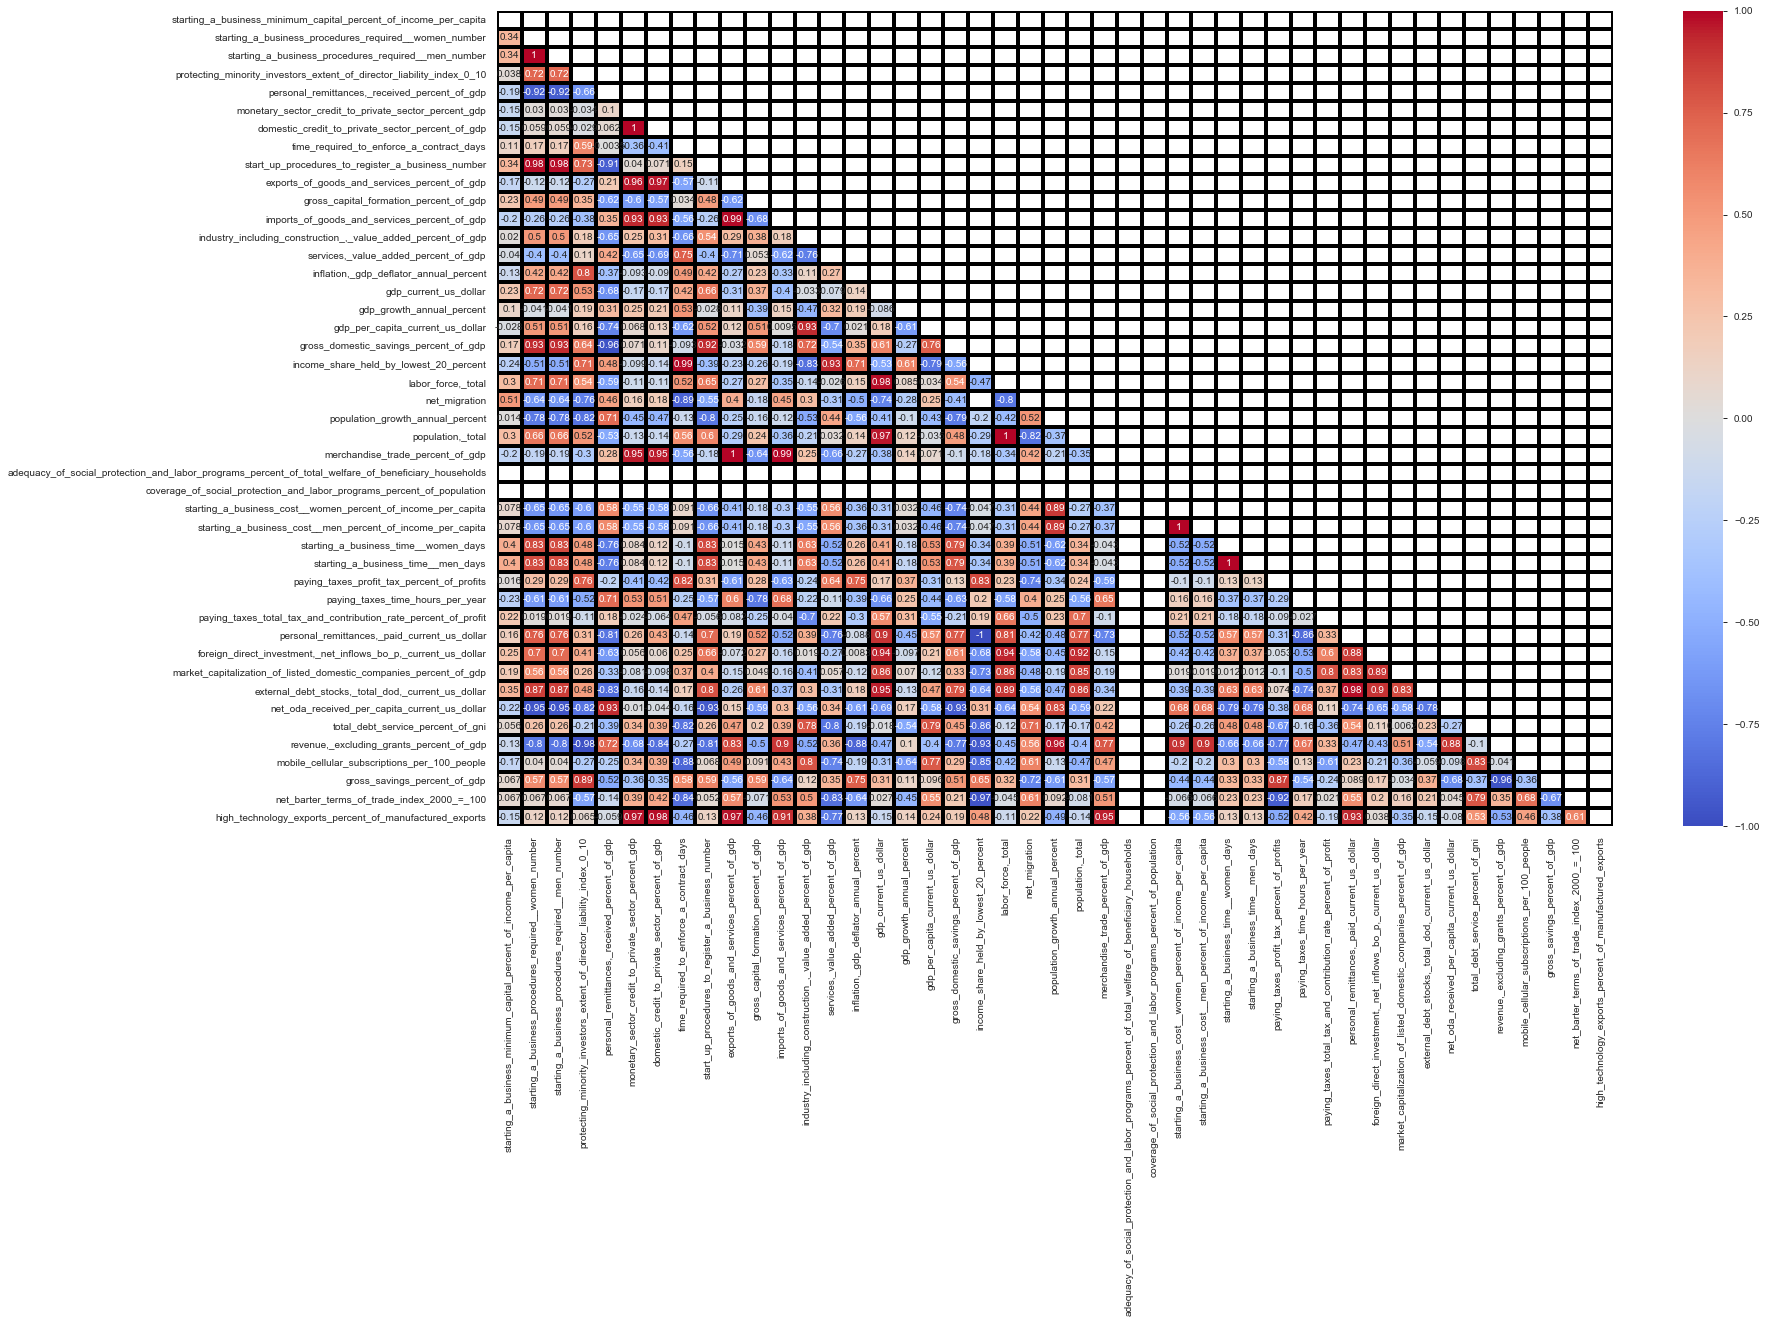

In [162]:
# Build the correlation matrix
corr_matrix_normalized = df_corr_matrix_normalized.corr()
# we want to show only bottom half of correlation matrix as the upper half is redundant to it
mask = np.zeros(corr_matrix_normalized.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True 

fig, ax = plt.subplots(figsize=(25,15))         # Sample figsize in inches

svm = sn.heatmap(data=corr_matrix_normalized, annot=True, cmap='coolwarm',ax=ax, mask=mask,fmt='.2g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black')
plt.show()

figure = svm.get_figure()
figure.savefig("normalized_correlation.jpg", dpi=400)




